In [1]:
import pandas as pd
# DATA MANIPULATION
import pandas as pd
pd.set_option("display.max_columns", None)
import numpy as np
import datetime

# STATS
from statsmodels.graphics.gofplots import qqplot

# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

# ML
## PREPROC
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
## METRICS
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
## SUPERVISED MODEL
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
## UNSUPERVISED
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
## TUNING
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

df = pd.read_csv("../raw_data/games_infos.csv")


In [2]:
df

,App_ID,Name,Release_Date,Estimated_Owners,Peak_CCU,Required_Age,Price,DLC_Count,About_The_Game,Supported_Languages,Full_Audio_Languages,Reviews,Header_Image,Website,Support_URL,Support_Email,Windows,Mac,Linux,Metacritic_Score,Metacritic_URL,User_Score,Positive,Negative,Score_Rank,Achievements,Recommendations,Notes,Average_Playtime_Forever,Average_Playtime_2Weeks,Median_Playtime_Forever,Median_Playtime_2Weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,32400,"STAR WARS™ Dark Forces (Classic, 1995)","16 Sep, 2009",500000 - 1000000,6,0,5.89,NaN,Purchase STAR WARS ™ Dark Forces Remaster Bund...,"['English', 'French', 'German', 'Italian', 'Sp...","['English', 'French', 'German', 'Italian', 'Sp...",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.lucasarts.com,http://help.starwars.com/,NaN,True,True,False,NaN,NaN,0,2510,293,NaN,NaN,2202.0,NaN,288,0,52,0,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,"FPS,Action,Classic,Sci-fi,Shooter,Retro,First-...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,2060170,Solas City Heroes,"25 Apr, 2023",0 - 20000,16,0,16.79,1.0,A Superhero Beat em’ up with a kinky twist! So...,['English'],['English'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://skyflarestudios.com/,https://discord.com/invite/hjxwd2k,NaN,True,False,False,NaN,NaN,0,0,0,NaN,25.0,116.0,Solas City Heroes contains 3D animations of ex...,0,0,0,0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1947530,Fidget Spinner RPG,"26 Sep, 2023",20000 - 50000,2,0,3.99,NaN,"Spin, craft, upgrade, and violate the laws of ...",['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,brycesummer@gmail.com,True,False,False,NaN,NaN,0,174,28,NaN,98.0,185.0,NaN,0,0,0,0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation","Casual,RPG,Clicker,Family Friendly,Crafting,Id...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,2020480,魔導聖戰:風色幻想,"8 Aug, 2022",50000 - 100000,2,0,1.59,NaN,游戏玩法 全新的『徽章转职系统』搭载，近百种职业任君挑选 可自由组合角色特技的『徽章特技系统...,['Traditional Chinese'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,https://www.fhyx.hk/server/,NaN,True,False,False,NaN,NaN,0,86,12,NaN,NaN,NaN,NaN,0,0,0,0,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy","Adventure,Strategy,RPG,Turn-Based Strategy,Boa...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1771430,Maid for Pleasure,"10 Dec, 2021",0 - 20000,1,0,5.99,NaN,Your family fortune is kaput and all you're le...,"['English', 'Spanish - Spain', 'Spanish - Lati...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,support@cherrykissgames.com,True,True,True,NaN,NaN,0,0,0,NaN,14.0,NaN,- Large portions of the game include nudity an...,0,0,0,0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22353,1204550,Kamtris,"12 May, 2020",0 - 20000,0,0,2.39,NaN,In the game you need to make love pairs by rot...,"['English', 'Russian', 'German', 'Spanish - Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,http://horovo-games.site,oasandios@gmail.com,True,False,True,NaN,NaN,0,0,0,NaN,8.0,NaN,Kamtris is a small game combining Kamasutra an...,0,0,0,0,Horovo Games,Horovo Games,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
223

In [3]:
(df['Required_Age'].value_counts()) / len(df['Required_Age'])

Required_Age
0     0.971688
18    0.014939
16    0.008140
12    0.002326
17    0.001297
15    0.000537
13    0.000447
7     0.000313
3     0.000134
20    0.000045
11    0.000045
1     0.000045
14    0.000045
Name: count, dtype: float64

In [4]:
y = pd.read_csv("../raw_data/player_history.csv")
y

,App_ID,Month,Avg. Players,Peak Players
0,32400,Last 30 Days,7.92,27.0
1,32400,February 2024,6.67,19.0
2,32400,January 2024,7.33,23.0
3,32400,December 2023,6.85,24.0
4,32400,November 2023,5.17,18.0
...,...,...,...,...
801266,278970,October 2015,29.24,125.0
801267,278970,September 2015,57.97,169.0
801268,278970,August 2015,106.67,230.0
801269,278970,July 2015,174.36,418.0


In [5]:
filtered_y = y[y['App_ID'] == 1597580]
filtered_y

,App_ID,Month,Avg. Players,Peak Players
801164,1597580,Last 30 Days,0.57,2.0
801165,1597580,March 2022,0.77,3.0
801166,1597580,January 2022,1.44,10.0
801167,1597580,December 2021,4.48,15.0


In [6]:
df = df[["App_ID","Release_Date","Price","Supported_Languages","Support_URL","Windows","Mac","Linux","Achievements","Developers","Publishers","Categories","Genres"]]

In [7]:
chinese_count = (df['Supported_Languages'].str.contains('Italian').sum())/len(df)
chinese_count

0.25919134090705787

In [8]:
import ast

languages_str = "['English', 'Russian']"
languages_list = ast.literal_eval(languages_str)
languages_list

['English', 'Russian']

In [9]:
unique_languages = df['Supported_Languages'].str.split(', ').explode().unique()
unique_languages

array(["['English'", "'French'", "'German'", "'Italian'",
       "'Spanish - Spain']", "['English']", "['Traditional Chinese']",
       "'Spanish - Spain'", "'Spanish - Latin America'",
       "'Simplified Chinese'", "'Traditional Chinese']", "'Russian'",
       "'Japanese'", "'Korean'", "'Portuguese - Brazil'", "'Turkish'",
       "'Welsh']", "'Turkish']", "'Russian']", "'Vietnamese'", "'Danish'",
       "'Portuguese - Portugal'", "'Japanese']", "'Dutch'", "'Polish'",
       "'Czech']", "'Ukrainian']", "['Simplified Chinese'",
       "'Portuguese - Brazil']", "'Simplified Chinese']", "'Korean']",
       "'French']", "['Traditional Chinese'", "'English'",
       "'Spanish - Latin America']", "'Traditional Chinese'", "'Arabic'",
       "'Bulgarian'", "'Hungarian'", "'Greek'", "'Norwegian'",
       "'Romanian'", "'Thai'", "'Ukrainian'", "'Finnish'", "'Czech'",
       "'Swedish'", "'German']", "['Simplified Chinese']", "'Croatian'",
       "'Estonian'", "'Hebrew'", "'Icelandic'", "'Latvia

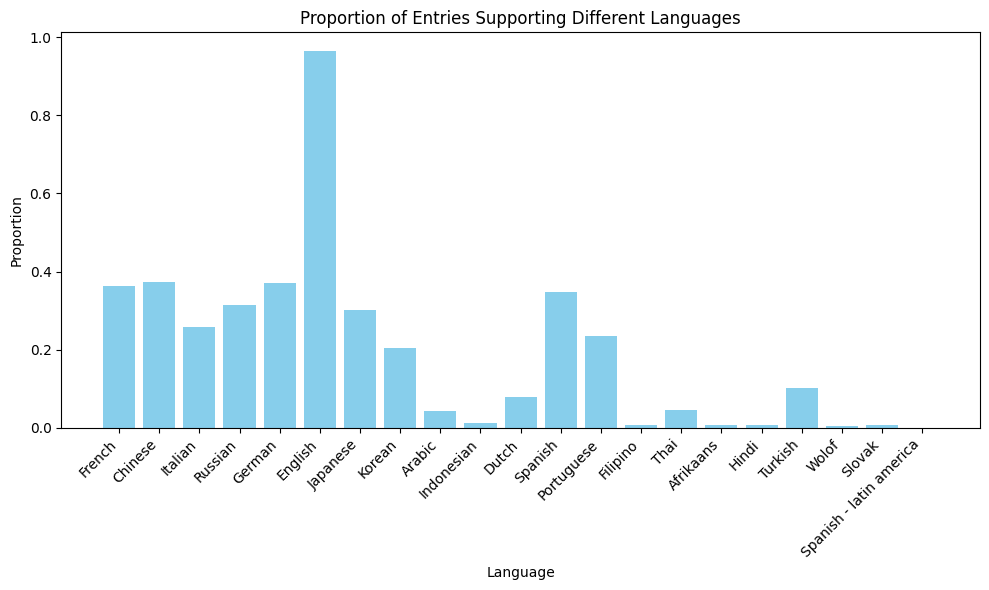

In [10]:
unique_languages = ["French", "Chinese", "Italian", "Russian", "German", "English", "Japanese", "Korean", "Arabic", "Indonesian", "Dutch", "Spanish", "Portuguese", "Filipino",
                   "Thai", "Afrikaans", "Hindi", "Turkish", "Wolof", "Slovak", 'Spanish - latin america']

# Initialize lists to store languages and their proportions
languages = []
proportions = []

# Calculate proportion for each language
for lang in unique_languages:
    lang_count = (df['Supported_Languages'].str.contains(lang).sum()) / len(df)
    languages.append(lang)
    proportions.append(lang_count)

# Plot the proportions
plt.figure(figsize=(10, 6))
plt.bar(languages, proportions, color='skyblue')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.title('Proportion of Entries Supporting Different Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipykernel_114133/3134347205.py:30: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  lang_count = (df['Supported_Languages'].str.contains(lang).sum()) / len(df)


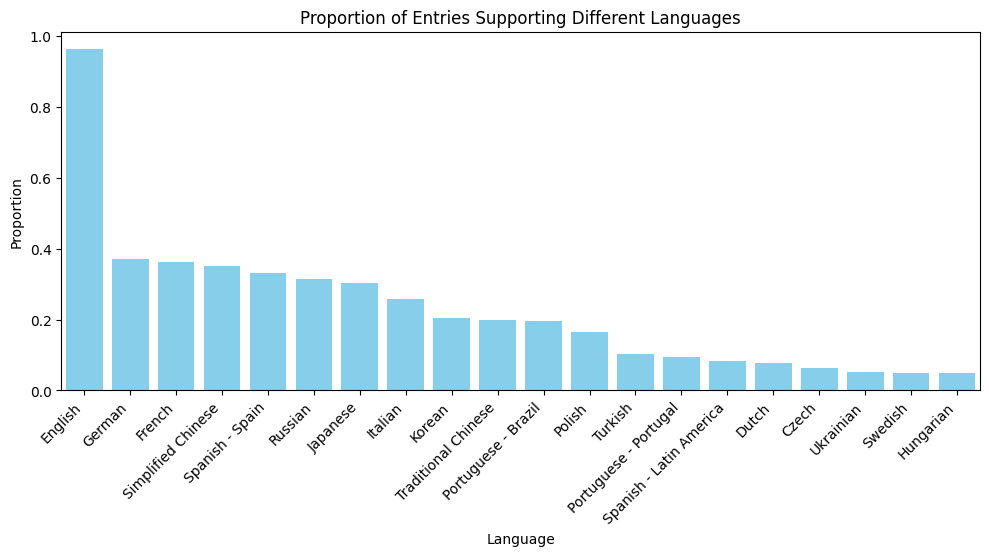

In [11]:
unique_languages = ["english",'French', 'german', 'italian', 'spanish - spain',
       'spanish - latin america', 'simplified chinese',
       'traditional chinese', 'russian', 'japanese', 'korean',
       'portuguese - brazil', 'turkish', 'welsh', 'vietnamese', 'danish',
       'portuguese - portugal', 'dutch', 'polish', 'czech', 'ukrainian',
       'arabic', 'bulgarian', 'hungarian', 'greek', 'norwegian',
       'romanian', 'thai', 'finnish', 'swedish', 'croatian', 'estonian',
       'hebrew', 'icelandic', 'latvian', 'lithuanian', 'maori', 'slovak',
       'slovenian', 'indonesian', 'serbian', 'uzbek', 'urdu', 'armenian',
       'igbo', 'sindhi', 'sinhala', 'cherokee', 'galician', 'catalan',
       'afrikaans', 'kannada', 'luxembourgish', 'hindi', 'gujarati',
       'kyrgyz', 'kazakh', 'turkmen', 'kinyarwanda',
       'tajik', 'odia', 'konkani', 'bangla', 'nepali', 'basque',
       'tigrinya', 'swahili', 'punjabi (gurmukhi)', 'punjabi (shahmukhi)',
       'georgian', 'wolof', 'bosnian', 'persian', 'telugu', 'tamil',
       'irish', 'valencian', 'belarusian', 'quechua', 'zulu', 'xhosa',
       'sotho', 'sorani', 'yoruba', 'uyghur', 'scots', 'tswana',
       'filipino', 'mongolian', 'hausa', 'dari', 'azerbaijani', 'amharic',
       'albanian', 'assamese', 'tatar', 'macedonian', 'marathi',
       'malayalam', 'malay', 'maltese', 'khmer', 'german;',
       'hungarian,polish', 'english dutch',
       'traditional chinese (text only)', 'lang_slovakian']

unique_languages = [lang.title() for lang in unique_languages]
# Initialize lists to store languages and their proportions
language_proportions = {}

# Calculate proportion for each language
for lang in unique_languages:
    lang_count = (df['Supported_Languages'].str.contains(lang).sum()) / len(df)
    language_proportions[lang] = lang_count

language_proportions

sorted_language_proportions = sorted(language_proportions.items(), key=lambda item: item[1], reverse=True)

# Créer un nouveau dictionnaire à partir des éléments triés
sorted_language_proportions_dict = {lang: proportion for lang, proportion in sorted_language_proportions}

# Extraire les langues triées et les proportions triées
sorted_languages = [lang for lang, proportion in sorted_language_proportions]
sorted_proportions = [proportion for lang, proportion in sorted_language_proportions]

# Tracer les proportions
plt.figure(figsize=(10, 6))
plt.bar(sorted_languages, sorted_proportions, color='skyblue')
plt.xlabel('Language')
plt.ylabel('Proportion')
plt.title('Proportion of Entries Supporting Different Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.xlim(-0.5, 19.5)
plt.show()

In [12]:
language_proportions

{'English': 0.9641738974863584,
 'French': 0.36246533679219967,
 'German': 0.37145540746041683,
 'Italian': 0.25919134090705787,
 'Spanish - Spain': 0.3309329993738259,
 'Spanish - Latin America': 0.0835495124787548,
 'Simplified Chinese': 0.35141783701583323,
 'Traditional Chinese': 0.19921280973253422,
 'Russian': 0.31465247338760177,
 'Japanese': 0.30239735217819125,
 'Korean': 0.20484837642007336,
 'Portuguese - Brazil': 0.1964844798282494,
 'Turkish': 0.10251364164952143,
 'Welsh': 0.005814473566508632,
 'Vietnamese': 0.030190535826102514,
 'Danish': 0.041282762322211286,
 'Portuguese - Portugal': 0.09464173897486358,
 'Dutch': 0.07845066642812416,
 'Polish': 0.16361034081760445,
 'Czech': 0.0633777618749441,
 'Ukrainian': 0.05210662849986582,
 'Arabic': 0.042535110474997764,
 'Bulgarian': 0.025628410412380356,
 'Hungarian': 0.048260130602021646,
 'Greek': 0.03023526254584489,
 'Norwegian': 0.03868861257715359,
 'Romanian': 0.032426871813221216,
 'Thai': 0.045173986939797836,
 'Fi

In [13]:
language_proportions['European'] = language_proportions['German'] + language_proportions['French'] + language_proportions['Italian'] + language_proportions['Spanish - Spain'] + language_proportions['Portuguese - Portugal']

# Trier le dictionnaire selon les proportions décroissantes
sorted_languages = sorted(language_proportions.items(), key=lambda x: x[1], reverse=True)

exclude_languages = ["German", "French", "Italian", 'Spanish - Spain', "Portuguese - Portugal"]

# Initialiser la liste des 10 premières langues
top_languages = []

# Parcourir les langues triées et ajouter à la liste si elles ne sont pas exclues
for lang, proportion in sorted_languages:
    if lang not in exclude_languages:
        top_languages.append(lang)
    if len(top_languages) == 10:  # Sortir de la boucle une fois que les 10 langues sont ajoutées
        break

# Afficher la liste des 10 langues avec les proportions les plus élevées
print(top_languages)

['European', 'English', 'Simplified Chinese', 'Russian', 'Japanese', 'Korean', 'Traditional Chinese', 'Portuguese - Brazil', 'Polish', 'Turkish']


In [16]:
# languages = [
#     'English', 'German', 'French', 'Simplified Chinese', 'Spanish - Spain',
#     'Russian', 'Japanese', 'Italian', 'Korean', 'Traditional Chinese',
#     'Portuguese - Brazil', 'Polish', 'Turkish', 'Portuguese - Portugal',
#     'Spanish - Latin America', 'Dutch', 'Czech', 'Ukrainian', 'Swedish', 'Hungarian'
# ]

# Appliquer les étapes à chaque langue
for lang in top_languages:
    if lang == 'European':  # Utilisez '==' pour la comparaison d'égalité, pas '='
        df[lang] = df['Supported_Languages'].str.contains("German|French|Italian|Spanish - Spain|Portuguese - Portugal", case=False, regex=True)
    else:
        df[lang] = df['Supported_Languages'].str.contains(lang, case=False, regex=True)
    
    df[lang] = df[lang].astype(int)

/tmp/ipykernel_114133/1862332581.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lang] = df['Supported_Languages'].str.contains("German|French|Italian|Spanish - Spain|Portuguese - Portugal", case=False, regex=True)
/tmp/ipykernel_114133/1862332581.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[lang] = df[lang].astype(int)
/tmp/ipykernel_114133/1862332581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [17]:
df

,App_ID,Release_Date,Price,Supported_Languages,Support_URL,Windows,Mac,Linux,Achievements,Developers,Publishers,Categories,Genres,European,English,Simplified Chinese,Russian,Japanese,Korean,Traditional Chinese,Portuguese - Brazil,Polish,Turkish
0,32400,"16 Sep, 2009",5.89,"['English', 'French', 'German', 'Italian', 'Sp...",http://help.starwars.com/,True,True,False,NaN,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action,1,1,0,0,0,0,0,0,0,0
1,2060170,"25 Apr, 2023",16.79,['English'],https://discord.com/invite/hjxwd2k,True,False,False,25.0,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action,0,1,0,0,0,0,0,0,0,0
2,1947530,"26 Sep, 2023",3.99,['English'],NaN,True,False,False,98.0,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation",0,1,0,0,0,0,0,0,0,0
3,2020480,"8 Aug, 2022",1.59,['Traditional Chinese'],https://www.fhyx.hk/server/,True,False,False,NaN,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy",0,0,0,0,0,0,1,0,0,0
4,1771430,"10 Dec, 2021",5.99,"['English', 'Spanish - Spain', 'Spanish - Lati...",NaN,True,True,True,14.0,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual,1,1,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22353,1204550,"12 May, 2020",2.39,"['English', 'Russian', 'German', 'Spanish - Sp...",http://horovo-games.site,True,False,True,8.0,Horovo Games,Horovo Games,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie",1,1,0,1,0,0,0,0,0,0
22354,1831320,"22 Dec, 2021",5.69,"['English', 'German', 'Russian']",https://support.alawar.com/,True,False,False,49.0,Game Mixer,Alawar Casual,"Single-player,Steam Achievements,Steam Cloud,F...","Adventure,Casual,Indie,Strategy",1,1,0,1,0,0,0,0,0,0
22355,1248450,"3 Sep, 2021",2.99,"['English', 'French', 'Spanish - Spain', 'Port...",http://hobofeller.com,True,False,False,43.0,Hobofeller,Hobofeller,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie,Simulation",1,1,1,0,0,0,0,1,0,0
22356,1597580,"15 Dec, 2021",2.99,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,27.0,Weird Beluga Studio S.L.,PLAION,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie",1,1,1,1,1,1,1,0,1,0


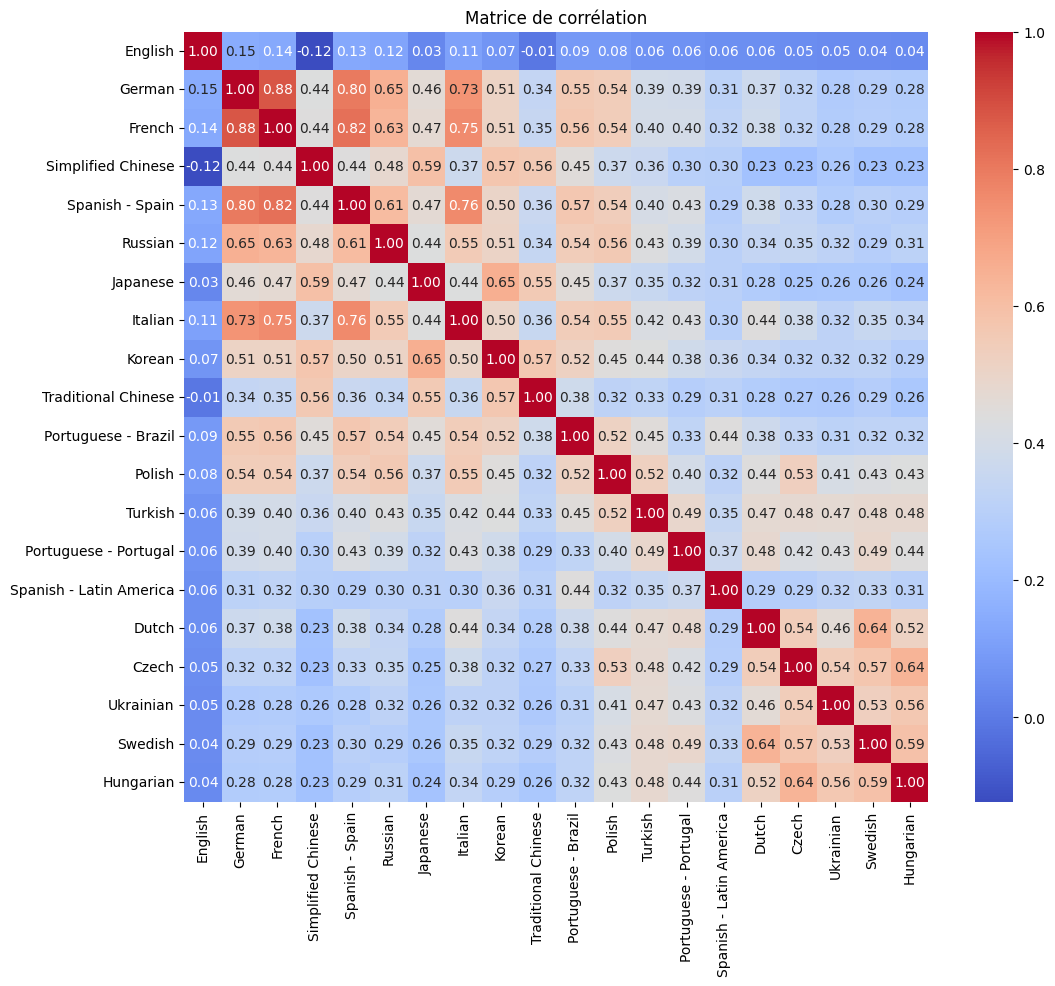

In [26]:
# Créer une sous-dataframe avec les colonnes sélectionnées
selected_df = df[languages]

# Calculer la matrice de corrélation
correlation_matrix = selected_df.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Calculer la matrice de corrélation
correlation_matrix = selected_df.corr()

# Créer un heatmap avec Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

In [ ]:
# df_test.loc[:, 'Italian'] = df_test['Supported_Languages'].str.contains('Italian')
# df_test['Italian'] = df_test['Italian'].astype(int)

In [19]:
proportions_df['Language'][:20]

0                     English
1                      German
2                      French
3          Simplified Chinese
4             Spanish - Spain
5                     Russian
6                    Japanese
7                     Italian
8                      Korean
9         Traditional Chinese
10        Portuguese - Brazil
11                     Polish
12                    Turkish
13      Portuguese - Portugal
14    Spanish - Latin America
15                      Dutch
16                      Czech
17                  Ukrainian
18                    Swedish
19                  Hungarian
Name: Language, dtype: object

In [20]:
import pandas as pd

# Créer un DataFrame à partir des résultats de proportions
one_hot_languages = pd.get_dummies(proportions_df['Language'][:20])

# Concaténer les proportions et les variables one-hot
proportions_with_one_hot = pd.concat([proportions_df['Proportion'], one_hot_languages], axis=1)

# Calculer la matrice de corrélation
correlation_matrix = proportions_with_one_hot.corr()

# Afficher la matrice de corrélation
print(correlation_matrix)

                         Proportion     Czech     Dutch   English    French  \
Proportion                 1.000000 -0.187748 -0.170731  0.829263  0.149926   
Czech                     -0.187748  1.000000 -0.052632 -0.052632 -0.052632   
Dutch                     -0.170731 -0.052632  1.000000 -0.052632 -0.052632   
English                    0.829263 -0.052632 -0.052632  1.000000 -0.052632   
French                     0.149926 -0.052632 -0.052632 -0.052632  1.000000   
German                     0.160076 -0.052632 -0.052632 -0.052632 -0.052632   
Hungarian                 -0.204816 -0.052632 -0.052632 -0.052632 -0.052632   
Italian                    0.033328 -0.052632 -0.052632 -0.052632 -0.052632   
Japanese                   0.082108 -0.052632 -0.052632 -0.052632 -0.052632   
Korean                    -0.028026 -0.052632 -0.052632 -0.052632 -0.052632   
Polish                    -0.074584 -0.052632 -0.052632 -0.052632 -0.052632   
Portuguese - Brazil       -0.037469 -0.052632 -0.052

In [ ]:
import seaborn as sns

# Créer la matrice de corrélation
correlation_matrix = df.corr()

# Tracer la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de Corrélation')
plt.show()

In [58]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='mixed', dayfirst=True)
df['Release_Date']

0       2009-09-16
1       2023-04-25
2       2023-09-26
3       2022-08-08
4       2021-12-10
           ...    
22353   2020-05-12
22354   2021-12-22
22355   2021-09-03
22356   2021-12-15
22357   2015-06-02
Name: Release_Date, Length: 22358, dtype: datetime64[ns]

In [91]:
df['Release_Date'].isna().sum()
df['Price'].isna().sum() #moyenne
# df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())

df['Achievements'].isna().sum() #to 0
df['Developers'].isna().sum() #on enleve
df['Publishers'].isna().sum() #on met le developper sinon on enleve
df['Categories'].isna().sum() # on eneleve
df['Genres'].isna().sum() # on rempli a la main ou on enleve

34

In [94]:
df.loc[:, 'Achievements'] = df['Achievements'].fillna(0)

In [95]:
df['Achievements'].isna().sum()

0

In [75]:
df.duplicated().sum()

0

In [77]:
df.dtypes.value_counts()

object            6
bool              3
float64           2
int64             1
datetime64[ns]    1
Name: count, dtype: int64

In [87]:
X_num = df.select_dtypes(include="number").drop(columns=["App_ID"])
X_num.dtypes

Price           float64
Achievements    float64
dtype: object

--------------------------------------------------


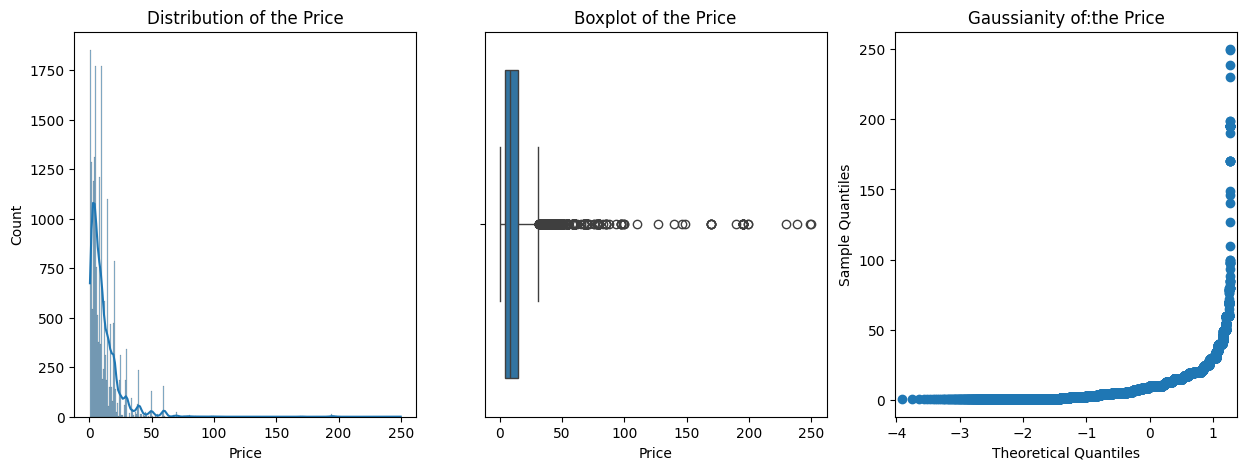

--------------------------------------------------


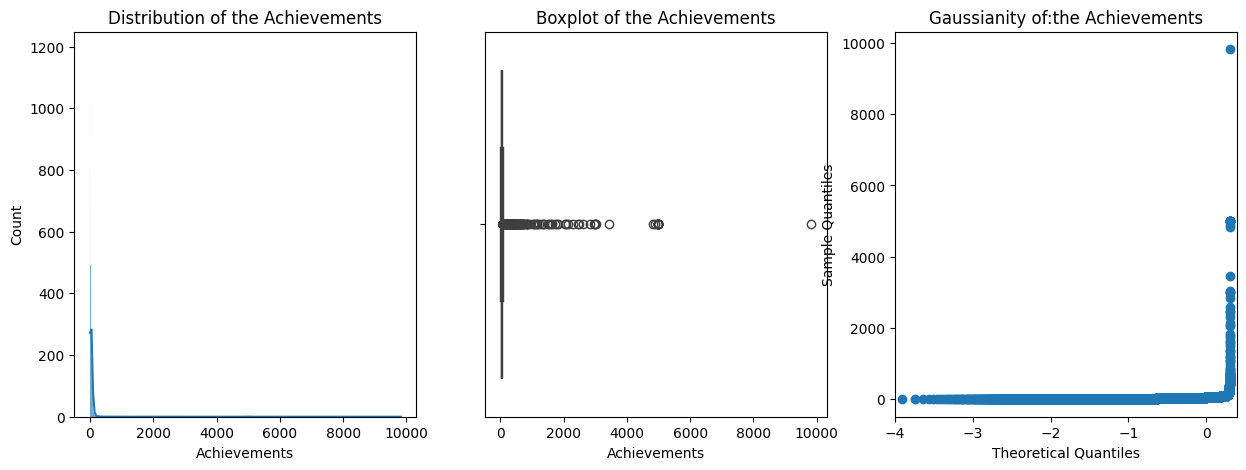

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

for variable in list(X_num.columns):
    print("-"*50)

    fig, ax = plt.subplots(1,3,figsize=(15,5))

    ax[0].set_title(f"Distribution of the {variable}")
    sns.histplot(data = X_num, x = f"{variable}", kde=True, ax = ax[0])

    ax[1].set_title(f"Boxplot of the {variable}")
    sns.boxplot(data = X_num, x = f"{variable}", ax=ax[1])

    ax[2].set_title(f"Gaussianity of:the {variable}")
    qqplot(X_num[f"{variable}"],line='s',ax=ax[2]);
    
    plt.show();

In [99]:
robust_features = ["Price", "Achievements"]
standard_features = []
minmax_features = []

In [100]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

scalers = ColumnTransformer([
    ("rob", RobustScaler(), robust_features), # Robust
    ("std", StandardScaler(), standard_features), # Std
    ("mm", MinMaxScaler(), minmax_features), # MinMax
])

numerical_pipeline = Pipeline([
    ("imputer", KNNImputer()),
    ("scalers", scalers)
])

numerical_pipeline

Pipeline(steps=[('imputer', KNNImputer()),
                ('scalers',
                 ColumnTransformer(transformers=[('rob', RobustScaler(),
                                                  ['Price', 'Achievements']),
                                                 ('std', StandardScaler(), []),
                                                 ('mm', MinMaxScaler(), [])]))])

In [101]:
X_cat

,Release_Date,Supported_Languages,Support_URL,Windows,Mac,Linux,Developers,Publishers,Categories,Genres
0,2009-09-16,"['English', 'French', 'German', 'Italian', 'Sp...",http://help.starwars.com/,True,True,False,LucasArts,"LucasArts,Lucasfilm,Disney","Single-player,Steam Cloud,Family Sharing",Action
1,2023-04-25,['English'],https://discord.com/invite/hjxwd2k,True,False,False,"Skyflare Studios,MrZGames",Skyflare Studios,"Single-player,Steam Achievements,Partial Contr...",Action
2,2023-09-26,['English'],NaN,True,False,False,Bryce Summer,Bryce Summer,"Single-player,Steam Cloud,Family Sharing","Casual,Indie,RPG,Simulation"
3,2022-08-08,['Traditional Chinese'],https://www.fhyx.hk/server/,True,False,False,弘煜科技事業股份有限公司,Phoenix Games,"Single-player,Family Sharing","Adventure,RPG,Strategy"
4,2021-12-10,"['English', 'Spanish - Spain', 'Spanish - Lati...",NaN,True,True,True,Miel,Cherry Kiss Games,"Single-player,Steam Achievements,Full controll...",Casual
...,...,...,...,...,...,...,...,...,...,...
22353,2020-05-12,"['English', 'Russian', 'German', 'Spanish - Sp...",http://horovo-games.site,True,False,True,Horovo Games,Horovo Games,"Single-player,Steam Achievements,Steam Cloud,F...","Casual,Indie"
22354,2021-12-22,"['English', 'German', 'Russian']",https://support.alawar.com/,True,False,False,Game Mixer,Alawar Casual,"Single-player,Steam Achievements,Steam Cloud,F...","Adventure,Casual,Indie,Strategy"
22355,2021-09-03,"['English', 'French', 'Spanish - Spain', 'Port...",http://hobofeller.com,True,False,False,Hobofeller,Hobofeller,"Single-player,Steam Achievements,Full controll...","Adventure,Casual,Indie,Simulation"
22356,2021-12-15,"['English', 'French', 'Italian', 'German', 'Sp...",NaN,True,False,False,Weird Beluga Studio S.L.,PLAION,"Single-player,Steam Achievements,Full controll...","Action,Adventure,Indie"


In [136]:
dev_count = df["Developers"].value_counts()
dev_count[dev_count != 1]

Developers
KOEI TECMO GAMES CO., LTD.    90
Kairosoft Co.,Ltd             41
Square Enix                   39
Choice of Games               39
Hosted Games                  37
                              ..
Neomateria Games GmbH          2
Shiying Studio                 2
No Future                      2
Bad Pixel                      2
Tony Wang                      2
Name: count, Length: 2836, dtype: int64

In [92]:
X_cat = df.select_dtypes(exclude="number")
X_cat.dtypes

Release_Date           datetime64[ns]
Supported_Languages            object
Support_URL                    object
Windows                          bool
Mac                              bool
Linux                            bool
Developers                     object
Publishers                     object
Categories                     object
Genres                         object
dtype: object

In [102]:
ordinal_features = []
onehot_features = [ "Supported_Languages", "Genres", "categories"]

In [103]:
ordinal_features_dict = {}

ordinal_values = [ordinal_features_dict[key] for key in ordinal_features_dict.keys()]
ordinal_values

[]

In [105]:
import numpy as np

encoders = ColumnTransformer([
    ("ord", OrdinalEncoder(categories = ordinal_values, 
                           dtype = np.int64,
                           handle_unknown = "use_encoded_value",
                           unknown_value = -1),
     ordinal_features), # Ordinal
    ("one_hot", OneHotEncoder(sparse_output=False,
                              drop="if_binary",
                              handle_unknown="ignore"),
     onehot_features) # OHE
], remainder="passthrough")

categorical_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoders", encoders)
])

categorical_pipeline

Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                ('encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ord',
                                                  OrdinalEncoder(categories=[],
                                                                 dtype=<class 'numpy.int64'>,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  []),
                                                 ('one_hot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Windows', 'Mac', 'Linux',
                                                   'Supported_Languages',
                                                   'Genres'])]))])

In [106]:
preprocessor = ColumnTransformer([
    ("num_pipeline", numerical_pipeline, make_column_selector(dtype_include="number")), # num_features
    ("cat_pipeline", categorical_pipeline, make_column_selector(dtype_exclude="number")) # cat_features
], remainder="passthrough").set_output(transform="pandas")

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', KNNImputer()),
                                                 ('scalers',
                                                  ColumnTransformer(transformers=[('rob',
                                                                                   RobustScaler(),
                                                                                   ['Price',
                                                                                    'Achievements']),
                                                                                  ('std',
                                                                                   StandardScaler(),
                                                                                   []),
                                                                                  ('mm',
                                                                                   MinMaxScaler(),
                                                                                   [])]))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f78ca3f7b20>),
                                ('cat_...
                                                                    transformers=[('ord',
                                                                                   OrdinalEncoder(categories=[],
                                                                                                  dtype=<class 'numpy.int64'>,
                                                                                                  handle_unknown='use_encoded_value',
                                                                                                  unknown_value=-1),
                                                                                   []),
                                                                                  ('one_hot',
                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                 handle_unknown='ignore',
                                                                                                 sparse_output=False),
                                                                                   ['Windows',
                                                                                    'Mac',
                                                                                    'Linux',
                                                                                    'Supported_Languages',
                                                                                    'Genres'])]))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f78ca3f7910>)])